<a href="https://colab.research.google.com/github/Resia05/unsupervised_learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%92%D0%B8%D0%BA%D0%BE%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BF%D1%80%D0%BE%D0%BC%D0%BF%D1%82%D1%96%D0%B2_%D1%96_%D0%B0%D0%B3%D0%B5%D0%BD%D1%82%D1%96%D0%B2_%D0%B2_Langchain_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Завдання 1: Виклик LLM з базовим промптом

Створіть можливість викликати LLM зі звичайним текстовим промптом.

Промпт має дозвляти отримати інформацію простою мовою на певну тему. В цьому завданні ми хочемо дізнатись про тему "Квантові обчислення".

Відповідь моделі повинна містити визначення, ключові переваги та поточні дослідження в цій галузі.

Обмежте відповідь до 200 символів і пропишіть в промпті аби відповідь була короткою (це зекономить Вам час і гроші на згенеровані токени).

В якості LLM можна скористатись як моделлю з HugginFace (рекомендую Mistral), так і ChatGPT4 або ChatGPT3. В обох випадках треба імпортувати потрібну "обгортку" (тобто клас, який дозволить ініціювати модель) з LangChain для виклику LLM за API, а також зчитати особистий токен з файла, наприклад, `creds.json`, який розміщений у Вас локально і Ви НЕ здаєте його в ДЗ і НЕ комітите в git 😏

Встановіть своє значення температури на свій розсуд (тут немає правильного чи неправильного значення) і напишіть, чому ви обрали саме таке значення для цього завдання.  

Запити можна робити як українською, так і англійською - орієнтуйтесь на те, де і чи хочете ви потім лишити цей проєкт і відповідна яка мова буде пасувати більше. В розвʼязках промпти - українською.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!pip -q install langchain langchain_openai huggingface_hub openai
!pip install -q langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.7 MB/s eta 0:00:00


In [10]:
print(os.environ.get("OPENAI_API_KEY")[:5] + "*****")

sk-pr*****


In [14]:
import json
import os
from langchain.llms import OpenAI

# Завантаження API ключів з файлу
with open('creds.json') as file:
    creds = json.load(file)

# Збереження ключа в середовище
os.environ["OPENAI_API_KEY"] = creds["OPENAI_API_KEY"]

# Ініціалізація моделі OpenAI з параметрами
llm = OpenAI(model="gpt-3.5-turbo", temperature=0.2, max_tokens=50)  # max_tokens обмежує довжину

# Створення промпту
prompt = (
    "Дайте коротке визначення, ключові переваги та актуальні дослідження в області "
    "'Квантові обчислення'. Відповідь має бути короткою, до 200 символів."
)

# Виклик LLM
response = llm(prompt)
print(response)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

Далі, щоб користуватись цією моделлю потрібно оплатити.

In [26]:
import json
import os
from langchain_huggingface import HuggingFaceEndpoint

# Завантаження API ключів з файлу
with open('creds.json') as file:
    creds = json.load(file)

# Додавання токену до середовища
os.environ["HUGGINGFACEHUB_API_TOKEN"] = creds["HUGGINGFACEHUB_API_TOKEN"]

# Встановлюємо загальну температуру
overal_temperature = 0.1

# Ініціалізація моделі Mistral
mistral = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    temperature=overal_temperature,
    max_new_tokens=200
)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [29]:
# Формулюємо промпт
prompt = (
    "Напишіть короткий опис Data Science англійською  мовою. "
)

# Виклик моделі
response_mistral = mistral(prompt)
print("Відповідь Mistral:", response_mistral)

Відповідь Mistral: 

Data Science is an interdisciplinary field that combines mathematics, statistics, computer science, and domain expertise to extract meaningful insights from structured and unstructured data. It involves cleaning, preparing, and analyzing data to create actionable knowledge that can be used to make informed decisions, optimize business processes, and predict future outcomes. Data Science is a rapidly growing field due to the increasing availability and volume of data, and the demand for data-driven solutions in various industries. It requires a strong foundation in mathematics and statistics, proficiency in programming languages such as Python and R, and a good understanding of machine learning algorithms and data visualization techniques.


### Завдання 2: Створення параметризованого промпта для генерації тексту
Тепер ми хочемо оновити попередній фукнціонал так, аби в промпт ми могли передавати тему як параметр. Для цього скористайтесь `PromptTemplate` з `langchain` і реалізуйте параметризований промпт та виклик моделі з ним.

Запустіть оновлений функціонал (промпт + модел) для пояснень про теми
- "Баєсівські методи в машинному навчанні"
- "Трансформери в машинному навчанні"
- "Explainable AI"

Виведіть результати відпрацювання моделі на екран.

In [31]:
from langchain.prompts import PromptTemplate

# Створення параметризованого промпта
prompt_template = PromptTemplate(
    input_variables=["topic"],
    template="Що таке {topic}? Опишіть його переваги та поточні дослідження, використовуючи рівно 200 символів."
)

# Список тем
topics = [
    "Баєсівські методи в машинному навчанні",
    "Трансформери в машинному навчанні",
    "Explainable AI"
]

# Виклик моделі для кожної теми та виведення результатів
for topic in topics:
    prompt = prompt_template.format(topic=topic)
    response = mistral(prompt)
    print(f"Тема: {topic}\nВідповідь: {response}\n")

Тема: Баєсівські методи в машинному навчанні
Відповідь: 

Bayesian methods in machine learning are probabilistic approaches that update beliefs based on new data, using Bayes' theorem. They offer several advantages: transparency, interpretability, and ability to handle uncertainty and missing data. Current research focuses on scalability, efficient inference methods, and integration with deep learning models.

Тема: Трансформери в машинному навчанні
Відповідь: 

Transformers in Machine Learning are deep learning models that leverage self-attention mechanisms to process sequential data. They revolutionized NLP tasks by capturing long-range dependencies, outperforming RNNs and LSTMs. Benefits include improved accuracy, faster convergence, and handling longer sequences. Current research focuses on applying Transformers to various domains like computer vision, speech recognition, and reinforcement learning.

Тема: Explainable AI
Відповідь: 

Explainable AI (XAI) is a subfield of AI that ex



### Завдання 3: Використання агента для автоматизації процесів
Створіть агента, який допоможе автоматично шукати інформацію про останні наукові публікації в різних галузях. Наприклад, агент має знайти 5 останніх публікацій на тему штучного інтелекту.

**Кроки:**
1. Налаштуйте агента типу ReAct в LangChain для виконання автоматичних запитів.
2. Створіть промпт, який спрямовує агента шукати інформацію в інтернеті або в базах даних наукових публікацій.
3. Агент повинен видати список публікацій, кожна з яких містить назву, авторів і короткий опис.

Для взаємодії з пошуком там необхідно створити `Tool`. В лекції ми використовували `serpapi`. Можна продовжити користуватись ним, або обрати інше АРІ для пошуку (вони в тому числі є безкоштовні). Перелік різних АРІ, доступних в langchain, і орієнтир по вартості запитів можна знайти в окремому документі [тут](https://hannapylieva.notion.site/API-12994835849480a69b2adf2b8441cbb3?pvs=4).

Лишаю також нижче приклад використання одного з безкоштовних пошукових АРІ - DuckDuckGo (не потребує створення токена!)  - можливо він вам сподобається :)


In [32]:
!pip install -q langchain_community duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.8 MB/s eta 0:00:00


In [33]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke("Obama's first name?")

"Since the office was established in 1789, 45 men have served in 46 presidencies. The first president, George Washington, won a unanimous vote of the Electoral College. [4] Grover Cleveland served two non-consecutive terms and is therefore counted as the 22nd and 24th president of the United States, giving rise to the discrepancy between the ... 2 of 2. Barack Obama: timeline Key events in the life of Barack Obama. Barack Obama (born August 4, 1961, Honolulu, Hawaii, U.S.) is the 44th president of the United States (2009-17) and the first African American to hold the office. Before winning the presidency, Obama represented Illinois in the U.S. Senate (2005-08). Here is a list of the presidents and vice presidents of the United States along with their parties and dates in office. ... Chester A Arthur: Twenty-First President of the United States. 10 Interesting Facts About James Buchanan. Martin Van Buren - Eighth President of the United States. Quotes From Harry S. Truman. Table of Cont

In [37]:
from langchain.agents import initialize_agent, AgentType

# Ініціалізація інструмента для пошуку
search_tool = DuckDuckGoSearchRun()

# Ініціалізація моделі
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    temperature=overal_temperature,
    max_new_tokens=200
)

# Налаштування агента з параметром для обробки помилок парсингу
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,  # Додати виведення для зручності відладки
    handle_parsing_errors=True  # Дозволити агенту повторювати спроби в разі помилок
)

# Створення промпта для пошуку
prompt = "Знайди 5 останніх наукових публікацій на тему штучного інтелекту. Включи назву, авторів і короткий опис кожної публікації."

# Виклик агента для виконання запиту
response = agent.run(prompt)

# Виведення результатів
print("Результати пошуку:")
print(response)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


> Entering new AgentExecutor chain...
 I need to find the latest 5 scientific publications on the topic of artificial intelligence. I should use DuckDuckGo Search to find this information.
Action: duckduckgo_search
Action Input: latest scientific publications artificial intelligence authors short description
Observation: Give to arXiv this week to help keep science open for all. Donate! ... Artificial Intelligence Authors and titles for recent submissions. Fri, 25 Oct 2024 Thu, 24 Oct 2024 ... Mon, 21 Oct 2024 See today's new changes. Total of 833 entries : 1-50 51-100 101-150 151-200... 801-833. Showing up to 50 entries per page: fewer | more | all. 



### Завдання 4: Створення агента-помічника для вирішення бізнес-задач

Створіть агента, який допомагає вирішувати задачі бізнес-аналітики. Агент має допомогти користувачу створити прогноз по продажам на наступний рік враховуючи рівень інфляції і погодні умови. Агент має вміти використовувати Python і ходити в інтернет аби отримати актуальні дані.

**Кроки:**
1. Налаштуйте агента, який працюватиме з аналітичними даними, заданими текстом. Користувач пише

```
Ми експортуємо апельсини з Бразилії. В 2021 експортували 200т, в 2022 - 190т, в 2023 - 210т, в 2024 який ще не закінчився - 220т. Зроби оцінку скільки ми зможемо експортувати апельсинів в 2025 враховуючи погодні умови в Бразилії і попит на апельсини в світі виходячи з економічної ситуації.
```

2. Створіть запит до агента, що містить чітке завдання – видати результат бізнес аналізу або написати, що він не може цього зробити і запит користувача (просто може бути все одним повідомлленням).

3. Запустіть агента і проаналізуйте результати. Що можна покращити?


In [38]:
# Ініціалізація інструмента для пошуку
search_tool = DuckDuckGoSearchRun()

# Ініціалізація моделі
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    temperature=0.1,
    max_new_tokens=200
)

# Налаштування агента
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

# Запит користувача
user_input = (
    "Ми експортуємо апельсини з Бразилії. "
    "В 2021 експортували 200т, в 2022 - 190т, в 2023 - 210т, в 2024 який ще не закінчився - 220т. "
    "Зроби оцінку скільки ми зможемо експортувати апельсинів в 2025 враховуючи погодні умови в Бразилії "
    "і попит на апельсини в світі виходячи з економічної ситуації."
)

# Виклик агента для виконання запиту
response = agent.run(user_input)

# Виведення результатів
print("Результати бізнес-аналізу:")
print(response)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


> Entering new AgentExecutor chain...
 I need to find out about the orange export trends from Brazil and the global demand for oranges to make an assessment for 2025
Action: duckduckgo_search
Action Input: orange export trends from Brazil and global orange demand 2025
Observation: Total orange production 1 is updated at 215.78 million boxes. The first update of the 2024-2025 orange crop forecast for the São Paulo and West-Southwest Minas Gerais citrus belt, published by Fundecitrus, carried out in cooperation with Markestrat and full professors from FEA-RP/USP and FCAV/Unesp 2, is 215.78 million boxes of 40.8 kg.Of the total, 200.46 million boxes come

Варіанти покращення, наприклад, щоб модель видавала не лише текстові значення з результатом, а візуалізації для кращого розуміння процесу. Загалом результат розв'язання задачі хороший.

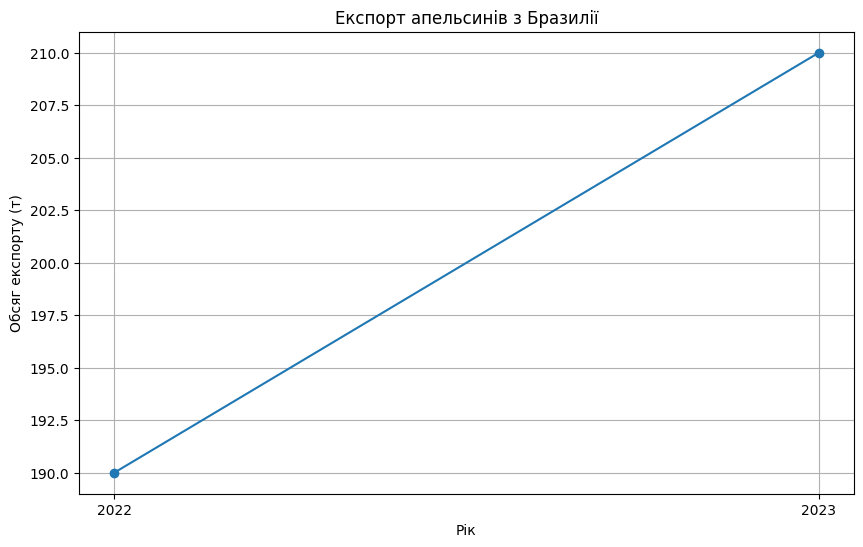

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def extract_data(text):
    # Використовуємо регулярні вирази для витягування даних
    pattern = r'(\d{4})\s*-\s*(\d+\.?\d*)т'
    matches = re.findall(pattern, text)

    # Створюємо DataFrame
    data = pd.DataFrame(matches, columns=['Year', 'Export'])
    data['Year'] = data['Year'].astype(int)
    data['Export'] = data['Export'].astype(float)
    return data

def plot_exports(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Year'], data['Export'], marker='o')
    plt.title('Експорт апельсинів з Бразилії')
    plt.xlabel('Рік')
    plt.ylabel('Обсяг експорту (т)')
    plt.grid()
    plt.xticks(data['Year'])
    plt.show()

# Приклад текстового вводу
input_text = "Ми експортуємо апельсини з Бразилії. В 2021 експортували 200т, в 2022 - 190т, в 2023 - 210т, в 2024 який ще не закінчився - 220т."

# Виконання
data = extract_data(input_text)
plot_exports(data)


Ще одна перевірка моделі

In [40]:
user_input2 = (
    "Ми вирощуємо яблука в Україні. "
    "В 2020 році ми зібрали 150т, в 2021 - 160т, в 2022 - 140т, в 2023 - 170т. "
    "За даними метеорологів, в цьому році було дуже спекотно, а в 2024 очікується середня температура на 2°C вище норми. "
    "Який обсяг експорту яблук ми можемо прогнозувати на 2025 рік, враховуючи зміни клімату та глобальний попит на фрукти?"
)
# Виклик агента для виконання запиту
response2 = agent.run(user_input2)

# Виведення результатів
print("Результати бізнес-аналізу:")
print(response2)



> Entering new AgentExecutor chain...
 This question is asking for a prediction of apple exports in 2025 based on historical production data and weather forecasts. I need to find historical apple production data in Ukraine and weather forecasts for the upcoming year.
Action: duckduckgo_search
Action Input: historical apple production in Ukraine, apple production trend, weather forecast Ukraine 2024
Observation: Send by email. The Fresh Apples, Grapes, and Pears: World Markets and Trade report recently released by the U.S. Department of Agriculture's Foreign Agricultural Service forecasts an increase in global apple production in 2024. Following a 5% reduction in 2023, the industry is poised for a rebound to 83.1 million metric tons, with increased ... The Ukrainian market is experiencing record prices for industrial apples, in some cases surpassing Polish prices. Small to medium-sized producers are struggling to sell on the local market and are finding it more profitable to sell for 

Більш склдану задачу модель вже не змогла розв'язати. Тобто ще є над чим працювати та покращувати )

In [41]:
user_input3 = (
    "У нас є дані про продажі груш. "
    "У 2021 році продали 300т, у 2022 - 320т, у 2023 - 350т. "
    "Який прогноз продажів груш на 2024 рік?"
)
# Виклик агента для виконання запиту
response3 = agent.run(user_input3)

# Виведення результатів
print("Результати бізнес-аналізу:")
print(response3)



> Entering new AgentExecutor chain...
 This question is about apple sales data for the years 2021, 2022, and 2023. The question asks for a prediction of sales for the year 2024. I can use the given data to make a linear trend prediction.
Action: duckduckgo_search
Action Input: apple sales trend 2024
Observation: The Company posted quarterly revenue of $119.6 billion, up 2 percent year over year, and quarterly earnings per diluted share of $2.18, up 16 percent year over year. "Today Apple is reporting revenue growth for the December quarter fueled by iPhone sales, and an all-time revenue record in Services," said Tim Cook, Apple's CEO. Apple registered an annual revenue of $383.29 billion in 2023. There are around 2.2 billion active Apple devices worldwide. iPhone is the largest category by sales, accounting for 50.46% of Apple's total quarterly revenue in Q2 2024. 161,000 employees work at Apple. 3.84 million apps are available in the Apple App Store; Apple Annual Revenue Samuel Axon